# Simple Face Mask Detection - Q1

**Introduction**

In this notebook, we will be evaluating your basic image/video data pre-processing and computer vision based modeling skills. You will be evaluated under three key ares in any computer vision task namely,

- Basic Preprocessing Techniques
- Basic Model Developement
- Basic Inference Techniques

**Task Description**

With the covid-19 pandemic face mask detection is a very common problem nowdays in industry with many differnt solutions. Computer vision based solutions are still capable of identifying face masks in both still images and videos rather than other solutions. Developers suggested and developed many libraries and APIs to detect face masks using computer vision. In this notebook you will be asked to develop a simple face mask detection algorithm using computer vision.

**Dataset Description**

You can use Q4 Dataset.zip to get the datatset for this task. Dataset contains images for two different classes which are masked faces and without masked faces.

- Mased faces - A folder contains 5000 face images with mask.
- Without Mased faces - A folder contains 5000 face images without mask.

**Code Structure**

Complete task is divided into three sepearte areas that are mentioned in **Introduction** section. You need to develop sepearte *python fucntions* to each functionality and wrap them up in one *python class* for each section. You may given predefined functions which are expected to be implemented by you and carry more weight on the final score. hence **DO NOT** remove those functions yet you can add any additional functions as you need.

**Hint: You have to create 3 sepearte classes for each key area and wrap all the functions within those classes as needed**

In [1]:
# Sample Class

class TestClass_1:

    def __init__(self):
        pass

    def method_1(self, parameter_1):
        pass

    def method_2(self, parameter_2):
        pass

    # There can be many methods

    def method_3(self, parameter_3):
        pass

### Basic Preprocessing Techniques

There are many vision based preprocessing techniques are out there. You will be asked to apply basic techniques such as,
- Input images/videos and read them
- Change color channels
- Crop, Resize etc

In [2]:
# Importing required libraries

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Any additional libraries go under here
# import ...
from PIL import Image
import zipfile
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

#Fill the Blanks Below , Don't edit it

In [3]:
class BasicPreprocessing:

    def __init__(self):
        pass

    def import_dataset(self):
        from google.colab import drive
        drive.mount('/content/drive')

        zip_file_path = '/content/drive/MyDrive/Q4Dataset.zip'
        extracted_folder_path = '/content/extracted_data'

        os.makedirs(extracted_folder_path, exist_ok=True)

        # Extract the zip file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extracted_folder_path)
        pass

    def bgr_2_gray(self,input_folder):
        image_files = os.listdir(input_folder)

        for image_file in image_files:
            # Load the RGB image using cv2
            image_path = os.path.join(input_folder, image_file)
            rgb_image = cv2.imread(image_path)

            # Convert RGB image to grayscale using cv2
            gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

            # Save the grayscale image, overwriting the original RGB image
            cv2.imwrite(image_path, gray_image)

    def resize(self,input_folder, output_folder, target_size):

        os.makedirs(output_folder, exist_ok=True)

        # List all image files in the input folder
        image_files = os.listdir(input_folder)

        for image_file in image_files:
            # Load the image using PIL
            image_path = os.path.join(input_folder, image_file)
            image = Image.open(image_path)

            # Crop the center of the image
            width, height = image.size
            left = (width - target_size[0]) // 2
            top = (height - target_size[1]) // 2
            right = left + target_size[0]
            bottom = top + target_size[1]
            cropped_image = image.crop((left, top, right, bottom))

            # Resize the cropped image to the target size
            resized_image = cropped_image.resize(target_size, Image.LANCZOS)

            # Convert the PIL Image to a NumPy array
            np_image = np.array(resized_image)


            output_path = os.path.join(output_folder, image_file)
            cv2.imwrite(output_path, cv2.cvtColor(np_image, cv2.COLOR_RGB2BGR))
        pass

    def normalize(self,input_folder, output_folder):

        os.makedirs(output_folder, exist_ok=True)

        # List all image files in the input folder
        image_files = os.listdir(input_folder)

        for image_file in image_files:
            # Load the image using PIL
            image_path = os.path.join(input_folder, image_file)
            image = Image.open(image_path)

            # Convert the image to a NumPy array and normalize the pixel values
            normalized_image = np.array(image) / 255.0

            # Save the normalized image in the output folder
            output_path = os.path.join(output_folder, image_file)
            normalized_image = Image.fromarray((normalized_image * 255).astype(np.uint8))
            normalized_image.save(output_path)
        pass

    def cate_to_dummy(self,input_folder_1, input_folder_2, output_folder):
        labeled_data = []

        os.makedirs(output_folder, exist_ok=True)

        # Label images in folder 1 as '1' (masked)
        for image_file in os.listdir(input_folder_1):
            image_path = os.path.join(input_folder_1, image_file)

            # Save the image to the output folder with the same filename
            output_path = os.path.join(output_folder, image_file)
            os.rename(image_path, output_path)  # Move the image to the output folder

            labeled_data.append((output_path, 1))  # Append the image path and label '1'

        # Label images in folder 2 as '0' (not masked)
        for image_file in os.listdir(input_folder_2):
            image_path = os.path.join(input_folder_2, image_file)

            # Save the image to the output folder with the same filename
            output_path = os.path.join(output_folder, image_file)
            os.rename(image_path, output_path)  # Move the image to the output folder

            labeled_data.append((output_path, 0))  # Append the image path and label '0'

        return labeled_data

        pass

    def reshape_data(self,labeled_data, output_folder, new_size=(64,64)):
        os.makedirs(output_folder, exist_ok=True)

        reshaped_data = []
        for image_path, label in labeled_data:
                image = Image.open(image_path)
                resized_image = image.resize(new_size)
                output_path = os.path.join(output_folder, os.path.basename(image_path))
                resized_image.save(output_path)
                reshaped_data.append((output_path, label))
        return reshaped_data
        pass


    def train_test(self,df, label_column, test_size=0.2, validation_size=0.2, random_state=None):

        if label_column not in df.columns:
            raise ValueError(f"Column '{label_column}' not found in the dataframe.")

        # Split the data into train + validation and test sets.
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            df.drop(columns=[label_column]),
            df[label_column],
            test_size=test_size,
            random_state=random_state
        )

        #  Split the train + validation data into train and validation sets.
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val,
            y_train_val,
            test_size=validation_size / (1 - test_size),
            random_state=random_state
        )

        # Return the resulting dataframes.
        train_df = pd.concat([X_train, y_train], axis=1)
        test_df = pd.concat([X_test, y_test], axis=1)
        val_df = pd.concat([X_val, y_val], axis=1)

        return train_df, test_df, val_df



    # All other customized methods go under here

    def any_name(self):
        pass

### Basic Model Development

There are many ways that you can develop either a machine learing model or deep learning model. Also you can use pretrained models like Resnet50, VGG16, VGG19 etc. But under this task you will be asked to develop a simple model without using any pretrained model.

**Hint: Use tensorflow, pytorch or any ML framework you are comfortable with to extract features**

In [16]:
class ModelDevelopment:

    def __init__(self):
        pass

    def extract_image_features(self,df):
        def preprocess_image(image_path):
            image = tf.io.read_file(image_path)
            image = tf.image.decode_jpeg(image, channels=1)
            return image

        # Load images from the DataFrame and preprocess them
        image_paths = df['Image_Path'].values
        images = [preprocess_image(path) for path in image_paths]
        images = np.array(images)

        # Load labels from the DataFrame
        labels = df['Label'].values

        return images, labels


    def train_model(self,train_images, train_labels,val_images, val_labels):

        # Build the CNN model.
        model = models.Sequential([
            layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.2),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.2),
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.4),
            layers.Dense(1, activation='sigmoid')
        ])

        # Compile the model.
        model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

        # Define the early stopping callback
        early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        # Train the model with early stopping.
        history = model.fit(train_images, train_labels, epochs=10, batch_size=32,
                            validation_data=(val_images, val_labels),
                            callbacks=[early_stopping])

        return model,history
        pass

    def test_model(self,model,test_images, test_labels):
        # Evaluate the model on the test set.
        test_loss, test_accuracy = model.evaluate(test_images, test_labels)
        print(f"Test accuracy: {test_accuracy:.4f}")
        pass

    def plot_graphs(self,history):
        # Plot training and validation accuracy
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Epoch vs Accuracy')
        plt.legend()
        plt.show()

        # Plot training and validation loss
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Epoch vs Loss')
        plt.legend()
        plt.show()

    # All other customized methods go under here

    def any_name(self):
        pass

### Basic Inference Techniques

In here you will be asked to develop a detection method to detect masked faces in static images.

In [17]:
class BasicInference:

    def __init__(self):
        pass

    def detect_images(self,model,test_set):
        selected_row = test_set.iloc[20]

        # Extract the image path from the selected row
        image_path = selected_row['Image_Path']

        # Preprocess and load the image using the preprocess_and_load_data function
        image, label = ModelDevelopment().extract_image_features(pd.DataFrame([selected_row]))

        # Load the trained CNN model
        trained_model = model
        # Perform inference on the preprocessed image
        predicted_label = model.predict(image)

        # Convert the predicted label from the probability to the actual class (0 or 1 in this case)
        predicted_class = 1 if predicted_label[0] > 0.5 else 0

        # Define the class labels (Non-Masked and Masked)
        class_labels = {0: "Non-Masked", 1: "Masked"}

        # Display the image and the predicted class with class labels
        plt.imshow(image[0, :, :, 0], cmap='gray')  # For grayscale images
        plt.title(f"True Label: {class_labels[label[0]]}, Predicted Label: {class_labels[predicted_class]}")
        plt.axis('off')
        plt.show()
        pass


    # All other customized methods go under here

    def any_name(self):
        pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
142/142 [==============================] - 23s 151ms/step - loss: 1.1218 - accuracy: 0.6471 - val_loss: 0.4999 - val_accuracy: 0.7353
Epoch 2/10
142/142 [==============================] - 18s 124ms/step - loss: 0.4928 - accuracy: 0.7530 - val_loss: 0.4984 - val_accuracy: 0.7187
Epoch 3/10
142/142 [==============================] - 18s 123ms/step - loss: 0.4449 - accuracy: 0.7786 - val_loss: 0.3663 - val_accuracy: 0.8584
Epoch 4/10
142/142 [==============================] - 18s 125ms/step - loss: 0.3793 - accuracy: 0.8309 - val_loss: 0.3147 - val_accuracy: 0.8564
Epoch 5/10
142/142 [==============================] - 20s 140ms/step - loss: 0.3430 - accuracy: 0.8384 - val_loss: 0.2980 - val_accuracy: 0.8676
Epoch 6/10
142/142 [==============================] - 18s 125ms/step - loss: 0.3112 - accuracy: 0.8552 - val_loss: 0.2729 - val_accuracy: 0.8789
E

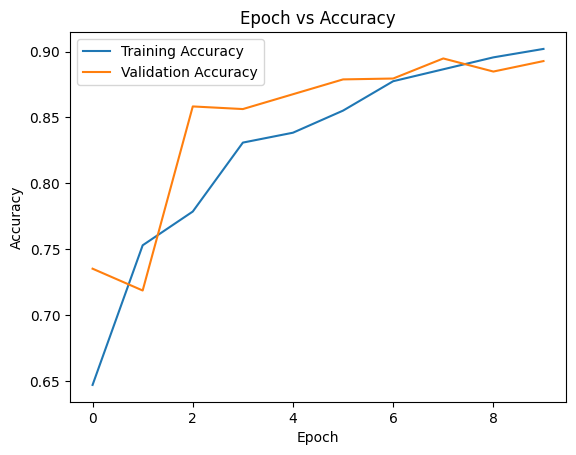

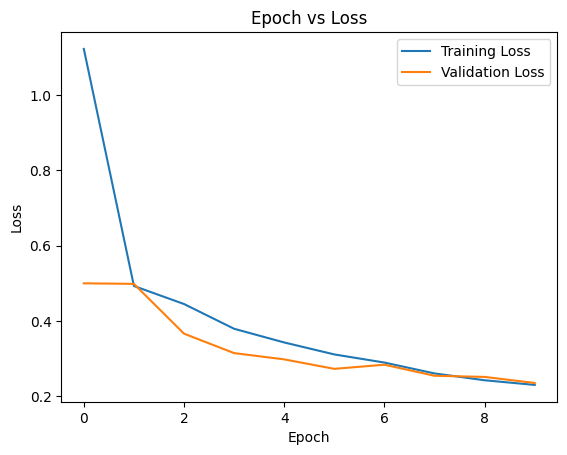

1/1 [==============================] - 0s 95ms/step


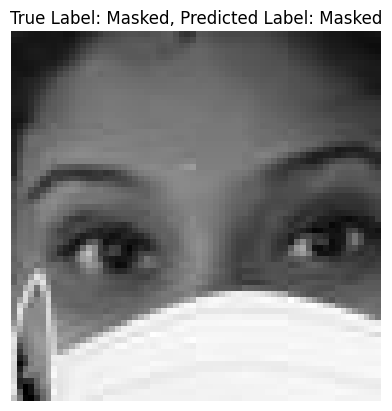

In [18]:
# You can use this space to play with classes and implement the main() fucntion

def main():
    data =  BasicPreprocessing()
    data.import_dataset()
    # Convert the datasets in both folders to grayscale
    data.bgr_2_gray("/content/extracted_data/data/with_mask")
    data.bgr_2_gray( '/content/extracted_data/data/without_mask')
    # Replace with the paths to the folders containing your RGB datasets
    input_folder_1 = '/content/extracted_data/data/with_mask'
    input_folder_2 = '/content/extracted_data/data/without_mask'

    # Replace with the desired output folders where grayscale images will be saved
    output_folder_1 = '/content/extracted_data/data/with_mask_crop'
    output_folder_2 = '/content/extracted_data/data/without_mask_crop'

    # Replace with the target size you want for the images (e.g., (128, 128))
    target_size = (200, 200)

    # Crop and resize the datasets in both folders
    data.resize(input_folder_1,output_folder_1,target_size)
    data.resize(input_folder_2, output_folder_2, target_size)
    # Replace with the paths to the folders containing your RGB datasets
    input_folder_1 = '/content/extracted_data/data/with_mask_crop'
    input_folder_2 = '/content/extracted_data/data/without_mask_crop'

    # Replace with the desired output folders where grayscale images will be saved
    output_folder_1 = '/content/extracted_data/data/with_mask_norm'
    output_folder_2 = '/content/extracted_data/data/without_mask_norm'

    # Normalize the datasets in both folders
    data.normalize(input_folder_1, output_folder_1)
    data.normalize(input_folder_2, output_folder_2)
    input_folder_1 = '/content/extracted_data/data/with_mask_norm'
    input_folder_2 = '/content/extracted_data/data/without_mask_norm'
    output_folder = '/content/labeled_images'

    labeled_data = data.cate_to_dummy(input_folder_1, input_folder_2, output_folder)
    # Define the output folder for the reshaped images
    reshaped_output_folder = '/content/reshaped_images'

    # Reshape the labeled images to (64, 64) and get reshaped data
    reshaped_data = data.reshape_data(labeled_data, reshaped_output_folder)
    # Convert the reshaped data to a DataFrame
    reshaped_df = pd.DataFrame(reshaped_data, columns=['Image_Path', 'Label'])

    # Shuffle the DataFrame
    shuffled_df = reshaped_df.sample(frac=1, random_state=48).reset_index(drop=True)
    train_set, test_set, val_set = data.train_test(shuffled_df,"Label")

    devloped_Model= ModelDevelopment()
    train_images, train_labels =  devloped_Model.extract_image_features(train_set)
    test_images, test_labels =  devloped_Model.extract_image_features(test_set)
    val_images, val_labels =  devloped_Model.extract_image_features(val_set)

    model ,hitory =devloped_Model.train_model(train_images, train_labels,val_images, val_labels)
    devloped_Model.plot_graphs(hitory)

    inference = BasicInference()
    inference.detect_images(model,test_set)

    pass

main()